Акции

яндекс

In [2]:
import pandas as pd
import requests
from datetime import datetime

url = f"http://iss.moex.com/iss/engines/stock/markets/shares/securities/YNDX/candles.json?from=2023-05-25&till=2024-04-03&interval=24"
response = requests.get(url)
data = response.json()
df2 = pd.DataFrame(data['candles']['data'], columns=data['candles']['columns'])

result_active = df2[['begin', 'close']]
result_active

,begin,close
0,2023-05-25 00:00:00,2350.0
1,2023-05-26 00:00:00,2322.0
2,2023-05-29 00:00:00,2390.0
3,2023-05-30 00:00:00,2303.6
4,2023-05-31 00:00:00,2324.2
...,...,...
215,2024-03-28 00:00:00,4003.8
216,2024-03-29 00:00:00,3994.0
217,2024-04-01 00:00:00,3975.0
218,2024-04-02 00:00:00,3868.0


In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
import pandas as pd
import requests
from datetime import datetime

def model_active():
    url = f"http://iss.moex.com/iss/engines/stock/markets/shares/securities/YNDX/candles.json?from=2023-05-25&till=2024-04-03&interval=24"
    response = requests.get(url)
    data = response.json()
    df2 = pd.DataFrame(data['candles']['data'], columns=data['candles']['columns'])

    result_active = df2[['begin', 'close']]

    model = SARIMAX(result_active['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=31) 

    start_date = '2024-04-04'
    end_date = pd.to_datetime(start_date) + pd.DateOffset(days=30)
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    result_yandex1 = {'data': date_range, 'price': forecast}
    result_yandex = pd.DataFrame(result_yandex1)
    print(result_yandex)

model_active()

c:\Users\Alexander\Desktop\НТО(инженерия)\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Alexander\Desktop\НТО(инженерия)\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


          data        price
220 2024-04-04  3965.940477
221 2024-04-05  4045.977773
222 2024-04-06  4076.783048
223 2024-04-07  4074.507734
224 2024-04-08  4092.305016
225 2024-04-09  4089.999828
226 2024-04-10  4085.563636
227 2024-04-11  4052.018141
228 2024-04-12  4068.174934
229 2024-04-13  4120.222330
230 2024-04-14  4106.272742
231 2024-04-15  4116.394984
232 2024-04-16  4159.974882
233 2024-04-17  4250.782697
234 2024-04-18  4270.408944
235 2024-04-19  4266.321687
236 2024-04-20  4297.233383
237 2024-04-21  4295.457737
238 2024-04-22  4289.898703
239 2024-04-23  4259.201603
240 2024-04-24  4272.979978
241 2024-04-25  4319.247676
242 2024-04-26  4297.458079
243 2024-04-27  4311.142384
244 2024-04-28  4354.865746
245 2024-04-29  4444.799777
246 2024-04-30  4465.342238
247 2024-05-01  4461.415537
248 2024-05-02  4491.228628
249 2024-05-03  4489.412823
250 2024-05-04  4483.944788


In [4]:
start_date = '2024-04-04'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=30)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

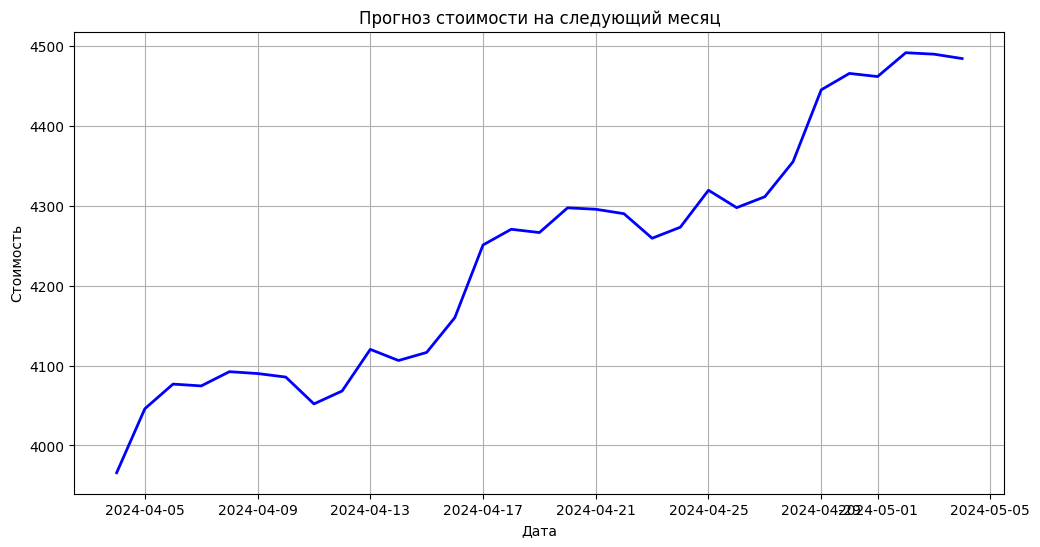

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(date_range, forecast, color='blue', linewidth=2, markersize=6)
plt.title('Прогноз стоимости на следующий месяц')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.grid(True)
plt.show()

In [17]:
result_yandex1 = {'data': date_range, 'price': forecast}
result_yandex = pd.DataFrame(result_yandex1)
result_yandex

,data,price
220,2024-04-04,3965.940477
221,2024-04-05,4045.977773
222,2024-04-06,4076.783048
223,2024-04-07,4074.507734
224,2024-04-08,4092.305016
225,2024-04-09,4089.999828
226,2024-04-10,4085.563636
227,2024-04-11,4052.018141
228,2024-04-12,4068.174934
229,2024-04-13,4120.222330


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
import pandas as pd
import requests
from datetime import datetime
from lxml import xml


url = f"https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2020&date_req2=02/04/2024&VAL_NM_RQ=CHF"
response = requests.get(url)
df = pd.read_xml(url)
result_currency = pd.DataFrame(df, columns=['Date', 'Value'])
result_currency

: 

In [ ]:
result_active = df2[['begin', 'close']]

model = SARIMAX(result_active['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

forecast = model_fit.forecast(steps=31) 

start_date = '2024-04-04'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=30)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
result_yandex1 = {'data': date_range, 'price': forecast}
result_yandex = pd.DataFrame(result_yandex1)
print(result_yandex)

In [12]:
url = f"https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2020&date_req2=02/04/2024&VAL_NM_RQ=EUR"
df = pd.read_xml(url)
df


ValueError: xpath does not return any nodes or attributes. Be sure to specify in `xpath` the parent nodes of children and attributes to parse. If document uses namespaces denoted with xmlns, be sure to define namespaces and use them in xpath.